# PSTAT 234 - Data and Uncertainty <a class="tocSkip">

## Sang-Yun Oh <a class="tocSkip">

# Coin Flips Re-visited

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/486jBqQEYs0?si=POPIVTIa3fWGrUq9" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

<div>
<img src="images/coinflip.png" width=500>
</div>

- Coin flips: https://www.youtube.com/watch?v=AYnJv68T3MM
- Fair dice: https://www.youtube.com/watch?v=G7zT9MljJ3Y

- Many real-world processes are much more complicated; however, we still try  

    > _Now it would be very remarkable if any system existing in the real world could be 
    exactly represented by any simple model. However, cunningly chosen parsimonious models 
    often do provide remarkably useful approximations. 
    [... example of modeling gas in physics ...]  
    For such a model there is no need to ask the question "Is the model true?". 
    If "truth" is to be the "whole truth" the answer must be "No". 
    The only question of interest is "Is the model illuminating and useful?"._  
    George Box

# Q: Is my model useful? <a class="tocSkip">

![Fallingwater - Frank Lloyd Wright](images/fallingwater.jpg)
[Fallingwater - Frank Lloyd Wright](https://en.wikipedia.org/wiki/Fallingwater)

# Models and Data

- In probability, underlying processes are represented by __models__ (often distributions)   
    e.g., flipping a coin, rolling a dice, etc.
   

- Often these models are often based on assumptions:  
    e.g. binomial distribution cannot model for edge landings

- How much data is needed to learn a 3-state multinomial random variable?

- Choosing a model is important: simple vs. complex models

- _When model complexity goes up, required amount of data increases_ :  
    e.g. two-sided coin vs. 30-sided dice 

- Deep learning model is highly flexible and massive amounts of data is needed to train it

## Model Fit to Data

- Data: {Heads, Heads, Tails}

- Model: Bernoulli random variable  
    $$ p(x) = \theta^{x}(1-\theta)^{1-x} $$

- Model fit to data: $\hat\theta = 2/3$

- Does model fit data well? Yes

- Will it generalize well to more coin flips? No

## Model Complexity and Data

- How do we choose complexity of models?

- Depends on complexity of reality and availability of data

- Dependency on data:

![curvefit](images/sphx_glr_plot_underfitting_overfitting_001.png)

- Fair comparison of methods require new set of data (out-of-sample data)

- **Goal: Choosing a model: complex enough to fit current data and generalizes well to new data**

![curvefit](images/sphx_glr_plot_underfitting_overfitting_001.png)

Suppose we had A LOT of data over the full interval of x, and you had to choose between model with degree 1 vs one with degree 15. Which would you choose?

a. Model with degree 1

b. Model with degree 15

## Data Amount/Quality and Models

- Data represents the real world to the analyst

- If chosen model is correct but data doesn't represent reality, model fit will be bad:  
    e.g. model coin edge-landing, but data doesn't contain any edge-landings

- If chosen model is not rich enough, model fit cannot capture the full reality:  
    e.g. do not model edge-landing, but data contains observed edge-landings

- If we don't have enough data to learn the model reliably, model will not generalize to new data  
    e.g. model fit with three coin flips will not generalize well

# Models in the Real World

- However, often building models from ground up can often be practically impossible

- e.g., where do you begin to build a model for [NCAA tournament](https://www.forbes.com/sites/kurtbadenhausen/2019/03/14/2019-march-madness-bracket-contest-prize-1-million-a-year-for-life-from-warren-buffett/#2ceb486a6755)? human behavior?

- Assuming there is a "useful" model, we can generate new data for comparison etc.

- Monte Carlo simulation 

## Monte Carlo simulation

![Monte Carlo Casino](images/sbm_casinos_10_2017_place_du_casinosoir_16_id111623_rsz.jpg)

### Monte Carlo simulation of card games

- Dealing cards is simple

- Repeatedly play games with simulated hands to determine outcome

- Calculating probability of card game outcomes by counting or averaging

### Monte Carlo simulation of complex processes

- Complex process $f$ with random input $X$: i.e. process of interest is $f(x)$

- Simulate data $X$, apply process $f$

- Calculate some probability or expected value (average)

### Monte Carlo simulation for Data Science?

- Monte Carlo simulation generates fake data. How is this useful?

- If $f$ is fairly accurate, we have ground truth

- We learn $\hat f$ from (fake) data

- We can compare $\hat f$ to $f$ without worrying about data availability

# Simulating Data

## Random variable

- Suppose a random variable $X$ is Bernoulli(0.2)

- Random variable $X$ does not have a single value

- An observation $x$ from $X$ has a value: i.e., 0 or 1 

- To express a distribution of $X$, multiple observations must be used:  
    e.g., $x_1, x_2, \dots, x_s$ or a vector of $s$ observations

## Random sample

- What is a random sample?

    > __Random sample__: Let $X_1,X_2,\dots,X_n$ be a set of $n$ independent random variables, all having the _same pdf,_ $f_X$. Then $X_1,X_2,\dots,X_n$ are said to be a _random sample of size $n$_.

- _Random sample_ is a collection of $n$ random variables: $X_1,X_2,\dots,X_n$

## Simulating of Random Sample

- Expressing each rv $X_i$ with $s$ observations, we need a matrix of observations

- i.e., capturing randomness of _random sample_ with _iid observations_, 
    we can generate many sets of random measurements   
$$\begin{align}
    x_1^{(1)},x_2^{(1)},\dots,x_n^{(1)}\\
    x_1^{(2)},x_2^{(2)},\dots,x_n^{(2)}\\
    \vdots\\
    x_1^{(s)},x_2^{(s)},\dots,x_n^{(s)}
\end{align}$$

- As an example, let's simulate convergence of the sample mean to the true mean

# Example: Consistency of the sample mean: dice example

- Dice throw is easy to simulate

- **Suppose average of $n$-throws is a complex phenomenon we want to study**

- What is expected value of sample average of $n$-observations? Variance?

- How can we approximate distribution of sample average of $n$-observations?  

- Can be calculated theoretically, but we will use simulation to calculate the properties.

Suppose one dice throw can be simulated reasonably well using 100 observations. How many observations do we need in order to simulate 5 independent throws of the same dice (iid)?

a. 500 observations

b. 100 observations because all throws are iid

## Simulating dice throws

- Each fair dice is a random variable $p_X(x)=1/6$ for all $x\in\{1,2,3,4,5,6\}$

- True value of $E(X)=\mu=3.5$ and $\text{Var}(X) = \sigma^2 = 2.917$

## Simulating multiple dice throws (random sample)

- $X_1,X_2,\dots,X_n$ is a random sample of size $n$ from a discrete pdf $p_X(x)$

- Sampling distribution gives $E(\hat\mu_n)=\mu$ and 
$\begin{align}
\text{Var}(\hat\mu_n) &= \text{Var}\left(\frac{1}{n}\sum_{i=1}^n X_i \right)\\
&=\frac{1}{n^2} \sum_{i=1}^n \text{Var}(X_i)= \frac{\sigma^2}{n}
&=\frac{\sigma^2}{n}
\end{align}$

- Can we verify $E(\hat\mu_n)$ and $\text{Var}(\hat\mu_n)$ from simulation?

- Can $\hat\mu_n$ be verify more complex phenomenon from simulation?  
    e.g. does $\hat\mu$ look like a consistent estimator for $\mu$?

## Simulating Data with Numpy

- Generate many random observations $(x_1^{(s)},x_2^{(s)},\dots ,x_n^{(s)})$ for $s=1,2,\dots, 10$ and $n=7$

- Each simulation is the _data_ of 7 dice throws

- Put them into a numpy array

In [2]:
import numpy as np
import pandas as pd

n = 7
S = 10

x = np.random.randint(size=(S, n), low=1, high=7)
print("shape of x:", x.shape)
print("unique values in x:", np.unique(x))

shape of x: (10, 7)
unique values in x: [1 2 3 4 5 6]


### Arrays
In `x`, one set of observations is one row. Get one row by indexing into `x`. First index is for the row:

In [3]:
x ## 10 rows (observations), 7 columns (random sample)

array([[4, 2, 4, 4, 2, 5, 6],
       [3, 4, 4, 5, 2, 6, 2],
       [6, 6, 4, 2, 3, 3, 5],
       [5, 5, 3, 2, 2, 6, 3],
       [2, 3, 4, 5, 2, 6, 1],
       [1, 1, 1, 1, 6, 4, 1],
       [5, 6, 5, 6, 2, 6, 5],
       [3, 4, 4, 5, 2, 2, 4],
       [2, 6, 6, 6, 6, 5, 3],
       [4, 6, 5, 3, 2, 4, 4]])

In [4]:
print("one row:", x[0])    
print("one value:", x[0, 4])

one row: [4 2 4 4 2 5 6]
one value: 2


In [5]:
print("one row:", x[-1])
print("one value:", x[-1, -1])

one row: [4 6 5 3 2 4 4]
one value: 4


### Array operations

- Numpy offers many convenient and flexible ways to slice and get a subset of numpy arrays (Chapter 2 in Vanderplas)

- In particular, [_views_ of arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Subarrays-as-no-copy-views) are useful. This is in contrast to R that always creates copies (even in function calls).

- Numpy makes array operations simple, whereas `list` does not:

In [6]:
## [1,2,3] + 3        ## list + scalar doesn't work and errors
np.array([10,20,30]) + 3 ## works fine

array([13, 23, 33])

In addition to common arithmetic functions (called ufuncs) other useful functions are:

In [7]:
np.add.outer([1,2,3], [10,20,30]) ## outer sum of first two columns

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

In [8]:
np.multiply.outer([1,2,3], [10,20,30]) ## outer product of first two rows

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

### Array Row/Column Means

Note that sample mean of one set of random observations can be computed by:

In [9]:
print("object method:", x[0].mean(), "function:", np.mean(x[0]))

object method: 3.857142857142857 function: 3.857142857142857


Internally, they are equivalent.

In [10]:
x0 = x[0]
# x0.mean??
# np.mean??

In [11]:
x0

array([4, 2, 4, 4, 2, 5, 6])

## Back to Simulation

- One row of `x` is one simulation: i.e., 7 dice throws. 

- One column of `x` is all 10 simulations for random variable $X_1$

- How do you compute mean of each simulation?

- Numpy `axis` refers to the direction of the array. 

- Giving argument `axis=0`, the mean function computes column averages.

In [12]:
temp = x.mean(axis=0)
print("x.mean(axis=0)   :", temp)
print("x.mean(0)[3]  :", temp[3])
print("x[:,3].mean() :", x[:,3].mean())

x.mean(axis=0)   : [3.5 4.3 4.  3.9 2.9 4.7 3.4]
x.mean(0)[3]  : 3.9
x[:,3].mean() : 3.9


Giving argument `axis=1`, the mean function computes row averages.

In [13]:
xmean = x.mean(axis=1)
print("xmean:", xmean)

xmean: [3.85714286 3.71428571 4.14285714 3.71428571 3.28571429 2.14285714
 5.         3.42857143 4.85714286 4.        ]


Plot the histogram of `xmean`:   

_Note that `xmean` does not contain many observations of the sample mean $\hat\mu_n$_

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(8, 6)

In [15]:
S = 10  # small number of simulations

x = np.random.randint(size=(S, n), low=1, high=7)
xmean = x.mean(axis=1)

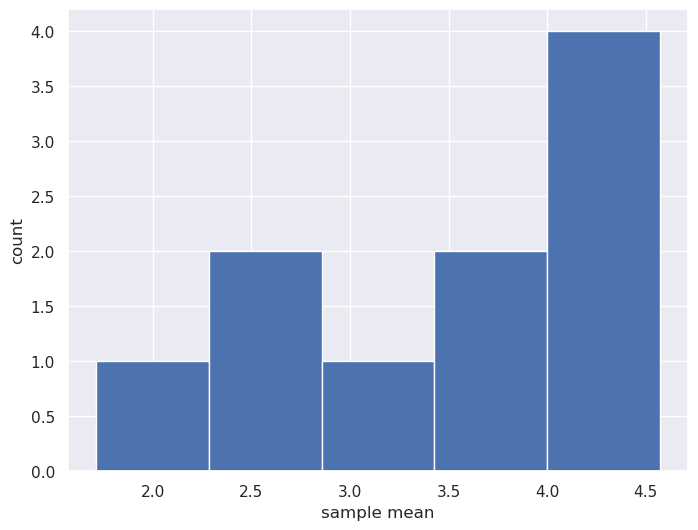

In [16]:
plt.hist(xmean, bins=5)
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

In [17]:
S = 1000  # Repeat with large number of simulations

np.random.seed(234)
x = np.random.randint(size=(S, n), low=1, high=7)
xmean = x.mean(axis=1)

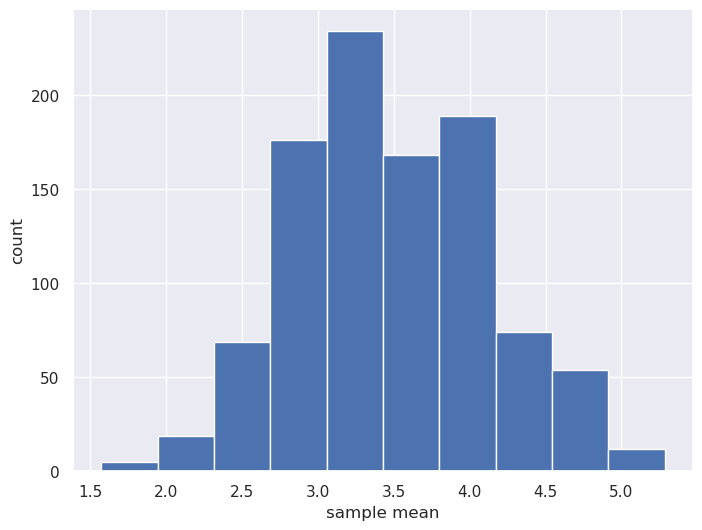

In [18]:
plt.hist(xmean)
plt.xlabel('sample mean')
plt.ylabel('count')
plt.show()

Theoretically,
- True $E(\hat\mu_n) = 3.5$
- True $\text{Var}(\hat\mu_n)=2.917/7\approx 0.4167$

Empirically (with random seed set),
- `xmean.mean()`: Estimated $E(\hat\mu_n)$ is $3.4832$ 
- `xmean.var()`: Estimated $\text{Var}(\hat\mu_n)$ is $0.4023$

## What are we seeing?

- Dice throws are simple to simulate

- Histogram is approximating sampling distribution of average of $n$ dice throws: i.e. $\hat\mu_n$

- No math, just dice throwing

- As $S\rightarrow\infty$, histogram will be increasingly better approximate distribution of sample average $\hat\mu_n$

## More complex phenomenon: Effect of Sample Size $n$

Let's veryfiy Chebyshev's inequality:
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 1 - \frac{\text{Var}(\hat\mu_n)}{\epsilon^2} 
= 1- \frac{\sigma^2}{n\epsilon^2} $$

- Plug-in variance of dice throws: $\sigma^2=2.917$

- Choose $\epsilon = 1$

- Create dice-throwing function 

In [19]:
## throw dice
def throw_dice(n=1):
    
    from numpy.random import randint
    
    return(randint(size=n, low=1, high=7))

## throw dice n times, compute mean
def muhat_n(n=1):
    
    return(throw_dice(n).mean())

Above functions return numpy arrays. We will compile results below in a bare list. Then create Pandas data frame from it (more on Pandas later). Some automatic type conversion is possible, but more strict than R.

In [20]:
n_choices = np.arange(20, 10001, 10)

results = []
for n in n_choices:
    results += [muhat_n(n)] ## appends to list

In [21]:
df = pd.DataFrame({
    'n_throws': n_choices,
    'muhat_n' : results,
})
df[:10]

,n_throws,muhat_n
0,20,3.000000
1,30,3.766667
2,40,3.725000
3,50,3.460000
4,60,3.783333
5,70,3.385714
6,80,3.387500
7,90,3.277778
8,100,3.550000
9,110,3.500000


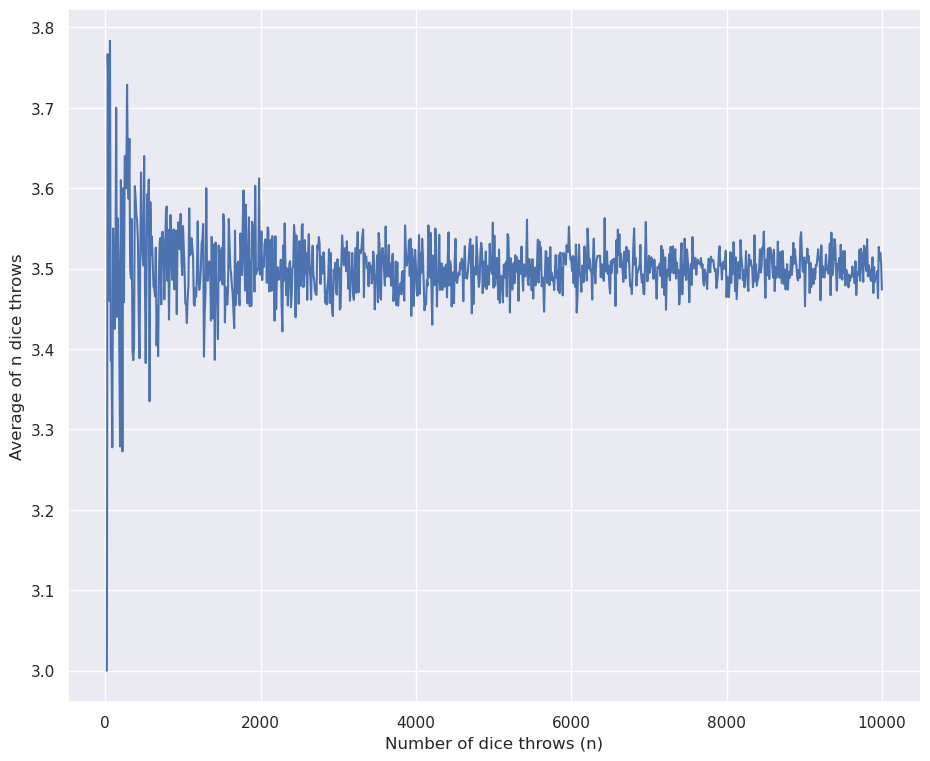

In [22]:
figsize(11, 9)
plt.plot(df['n_throws'], df['muhat_n']);
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

We can build on the result by showing where 95% bound according to Chebyshev's inequality.

For illustration, choosing $95\%$ probability and $n=50$ (also plug in $\sigma^2$), we would get as $\epsilon$:
$$ 
1- \frac{2.917}{50\cdot \epsilon^2} = 0.95\\
\epsilon = \sqrt{\frac{2.917}{0.05\cdot 50}}$$

Following computes error threshold $\epsilon$ guaranteed by Chebyshev's threshold.

In [23]:
epsilon_n = np.sqrt(2.917/(0.05*n_choices))
df['epsilon'] = epsilon_n

Plot the new plot
$$ \Pr(|\hat\mu_n - \mu| < \epsilon) > 0.95\\
\Pr(-\epsilon_n < \hat\mu_n - \mu < \epsilon_n)  > 0.95 $$

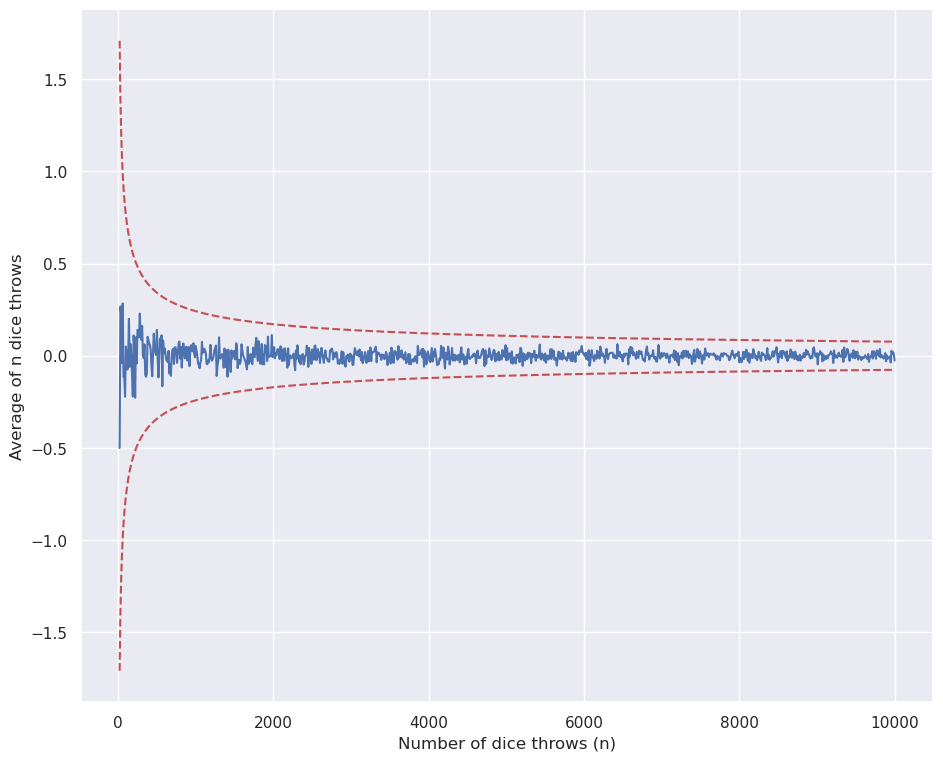

In [24]:
figsize(11, 9)
plt.plot((df['n_throws']),  df['muhat_n']-3.5);    ## subtract true mean 3.5
plt.plot((df['n_throws']),  df['epsilon'], '--r');
plt.plot((df['n_throws']), -df['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

In [25]:
## repeat computing mean of n throws s times
def repeat_muhat_n(n=1, s=100):
    
    out = [muhat_n(n) for one in range(s)]
    
    return({ 'min': min(out), 'max': max(out), 'mean': sum(out)/s})

In [26]:
repeat_muhat_n(10)

{'min': 2.4, 'max': 5.0, 'mean': 3.5740000000000003}

In [27]:
results = []
for n in n_choices:
    results += [repeat_muhat_n(n)] ## appends to list

In [28]:
df_new = pd.DataFrame(results)
df_new['n_throws'] = n_choices
df_new['epsilon'] = epsilon_n
df_new[:10]

,min,max,mean,n_throws,epsilon
0,2.200000,4.800000,3.520000,20,1.707923
1,2.600000,4.100000,3.513667,30,1.394513
2,2.700000,4.350000,3.517000,40,1.207684
3,3.040000,4.260000,3.498800,50,1.080185
4,3.000000,3.966667,3.506667,60,0.986070
5,3.057143,3.928571,3.467000,70,0.912923
6,3.062500,3.937500,3.493625,80,0.853961
7,3.044444,3.811111,3.504333,90,0.805122
8,3.140000,3.860000,3.527800,100,0.763806
9,3.163636,3.918182,3.512273,110,0.728261


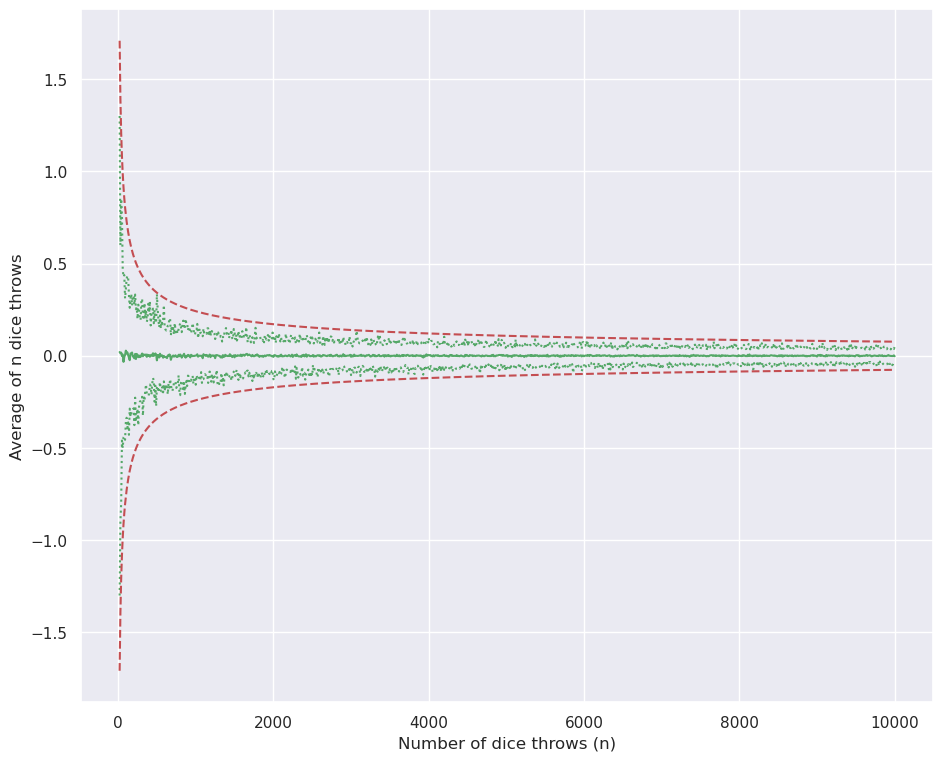

In [29]:
figsize(11, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g');    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r');
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r');
plt.xlabel("Number of dice throws (n)");
plt.ylabel("Average of n dice throws");

## Plot 80% and 90% bounds

Plot $\epsilon$ bounds corresponding to 80% and 90% probability. Interpret these bounds.

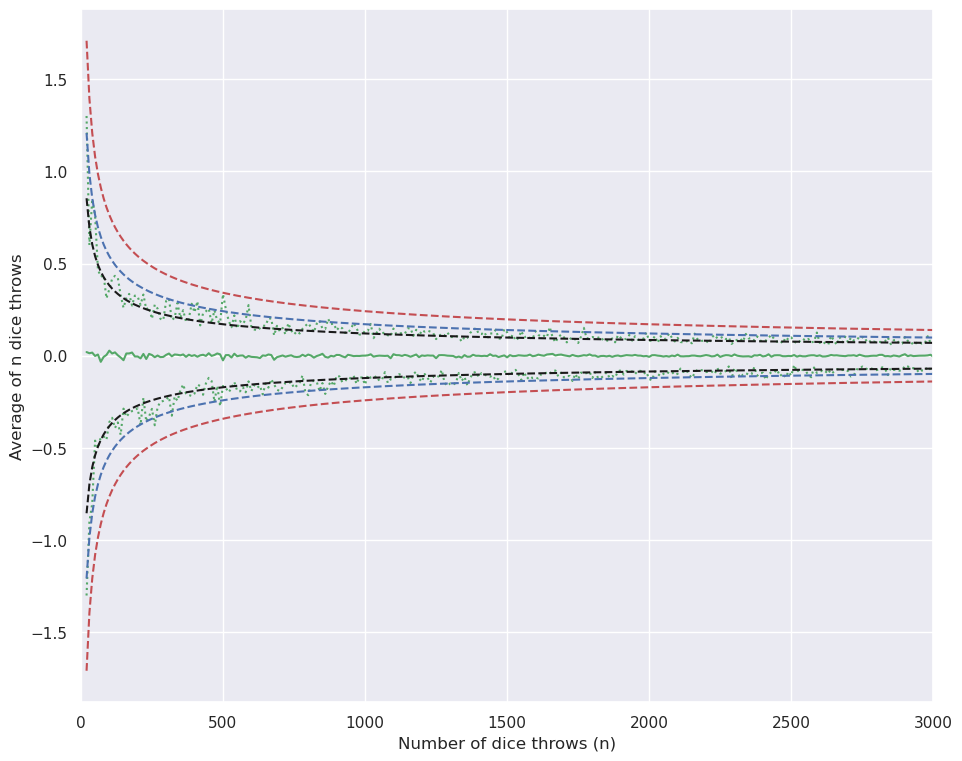

In [30]:
epsilon_n = np.sqrt(2.917/(0.1*n_choices))
df_new['epsilon_10'] = epsilon_n

epsilon_n = np.sqrt(2.917/(0.2*n_choices))
df_new['epsilon_20'] = epsilon_n

figsize(11, 9)
plt.plot((df_new['n_throws']),  df_new['mean']-3.5, '-g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['min'] -3.5, ':g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['max'] -3.5, ':g')    ## subtract true mean 3.5
plt.plot((df_new['n_throws']),  df_new['epsilon'], '--r')
plt.plot((df_new['n_throws']), -df_new['epsilon'], '--r')
plt.plot((df_new['n_throws']),  df_new['epsilon_10'], '--b')
plt.plot((df_new['n_throws']), -df_new['epsilon_10'], '--b')
plt.plot((df_new['n_throws']),  df_new['epsilon_20'], '--k')
plt.plot((df_new['n_throws']), -df_new['epsilon_20'], '--k')
plt.xlim(0, 3000)
plt.xlabel("Number of dice throws (n)")
plt.ylabel("Average of n dice throws")
plt.show()